In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
STATE_DIMS = 17
ACTION_DIMS = 6
TARGET_DIMS = STATE_DIMS + ACTION_DIMS
DATA_DIR = '../../dogo_results/data/'

In [3]:
training_datasets = [
    'D3RLPY-RT-0.1M-1-P0_1000000.npy',
    'D3RLPY-RT-0.2M-1-P0_1000000.npy',
    'D3RLPY-RT-0.5M-1-P0_1000000.npy',
    'D3RLPY-RT-1M-1-P0_1000000.npy',
    'SAC-RT-0.1M-0-P0_1000000.npy',
    'SAC-RT-0.25M-1-P0_1000000.npy',
    'SAC-RT-0.5M-1-P0_1000000.npy',
    'SAC-RT-1M-1-P0_1000000.npy',
    'SAC-RT-2M-1-P0_1000000.npy',
    'SAC-RT-3M-1-P0_1000000.npy',
    'D4RL-HC-M.npy',
    'D4RL-HC-ME.npy',
    'D4RL-HC-MR.npy',
    'D4RL-HC-R.npy',
    'RAND-1.npy',
    'RAND-2.npy',
    'RAND-3.npy',
    'RAND-4.npy',
    'RAND-5.npy',
    'RAND-6.npy',
    'RAND-7.npy',
    'RAND-8.npy',
    'RAND-9.npy',
    'RAND-10.npy',
]

In [4]:
states = np.vstack([np.load(os.path.join(DATA_DIR, tds))[:,:TARGET_DIMS] for tds in training_datasets])
states.shape

(15096895, 23)

In [5]:
pca = PCA(2)
pca.fit(states)

PCA(n_components=2)

In [7]:
pca.explained_variance_ratio_

array([0.34392953, 0.24815809])

# Online Training Datasets

In [16]:
d4rl_m = np.load(os.path.join(DATA_DIR,  'D4RL-HC-M_100000.npy'))[:,:TARGET_DIMS]
d4rl_me = np.load(os.path.join(DATA_DIR, 'D4RL-HC-ME_100000.npy'))[:,:TARGET_DIMS]
d4rl_mr = np.load(os.path.join(DATA_DIR, 'D4RL-HC-MR_100000.npy'))[:,:TARGET_DIMS]
d4rl_r = np.load(os.path.join(DATA_DIR,  'D4RL-HC-R_100000.npy'))[:,:TARGET_DIMS]

d3rlpy_01 = np.load(os.path.join(DATA_DIR, 'D3RLPY-RT-0.1M-1-P0_100000.npy'))[:,:TARGET_DIMS]
d3rlpy_02 = np.load(os.path.join(DATA_DIR, 'D3RLPY-RT-0.2M-1-P0_100000.npy'))[:,:TARGET_DIMS]
d3rlpy_05 = np.load(os.path.join(DATA_DIR, 'D3RLPY-RT-0.5M-1-P0_100000.npy'))[:,:TARGET_DIMS]
d3rlpy_1 = np.load(os.path.join(DATA_DIR, 'D3RLPY-RT-1M-1-P0_100000.npy'))[:,:TARGET_DIMS]

sac_05_m = np.load(os.path.join(DATA_DIR, 'SAC-RT-0.5M-1-P0_100000.npy'))[:,:TARGET_DIMS]
sac_1_m = np.load(os.path.join(DATA_DIR, 'SAC-RT-1M-1-P0_100000.npy'))[:,:TARGET_DIMS]
sac_2_m = np.load(os.path.join(DATA_DIR, 'SAC-RT-2M-1-P0_100000.npy'))[:,:TARGET_DIMS]
sac_3_m = np.load(os.path.join(DATA_DIR, 'SAC-RT-3M-1-P0_100000.npy'))[:,:TARGET_DIMS]

In [9]:
d3rlpy_01_trans = pca.transform(d3rlpy_01)
d3rlpy_02_trans = pca.transform(d3rlpy_02)
d3rlpy_05_trans = pca.transform(d3rlpy_05)
d3rlpy_1_trans = pca.transform(d3rlpy_1)

sac_05_m_trans = pca.transform(sac_05_m)
sac_1_m_trans = pca.transform(sac_2_m)
sac_2_m_trans = pca.transform(sac_1_m)
sac_3_m_trans = pca.transform(sac_3_m)

d4rl_m = pca.transform(d4rl_m)
d4rl_me = pca.transform(d4rl_me)
d4rl_mr = pca.transform(d4rl_mr)
d4rl_r = pca.transform(d4rl_r)

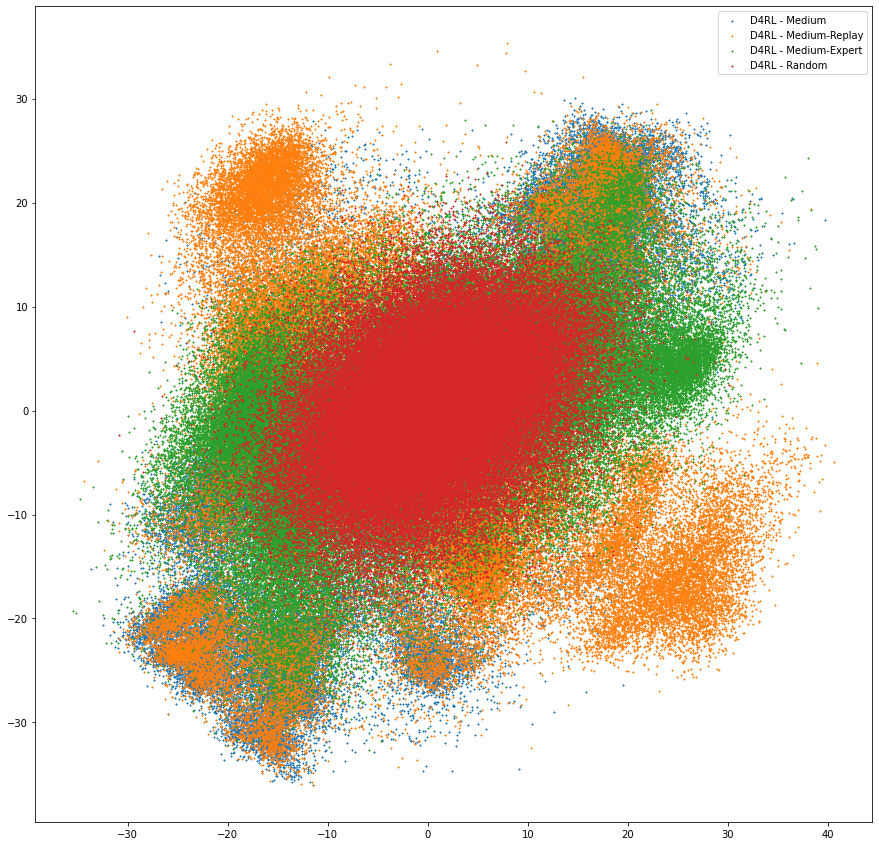

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(d4rl_m[:,0], d4rl_m[:,1], marker='x', s=1, label='D4RL - Medium')
ax.scatter(d4rl_me[:,0], d4rl_me[:,1], marker='x', s=1, label='D4RL - Medium-Replay')
ax.scatter(d4rl_mr[:,0], d4rl_mr[:,1], marker='x', s=1, label='D4RL - Medium-Expert')
ax.scatter(d4rl_r[:,0], d4rl_r[:,1], marker='x', s=1, label='D4RL - Random')

ax.legend()

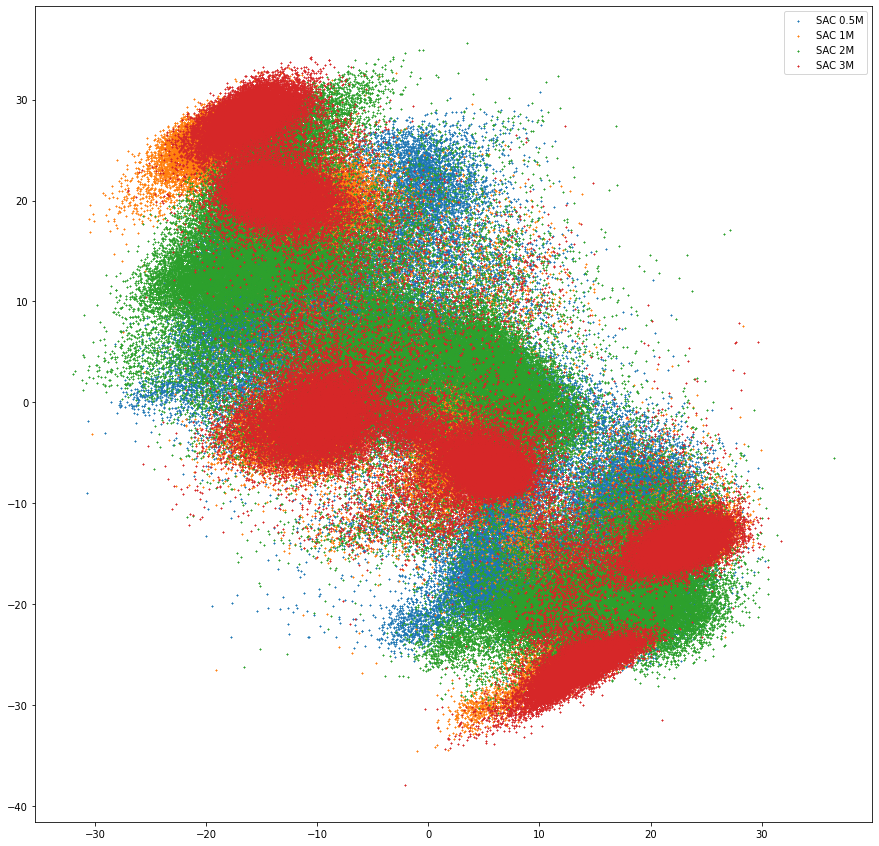

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(sac_05_m_trans[:,0], sac_05_m_trans[:,1], marker='x', s=1, label='SAC 0.5M')
ax.scatter(sac_1_m_trans[:,0], sac_1_m_trans[:,1], marker='x', s=1, label='SAC 1M')
ax.scatter(sac_2_m_trans[:,0], sac_2_m_trans[:,1], marker='x', s=1, label='SAC 2M')
ax.scatter(sac_3_m_trans[:,0], sac_3_m_trans[:,1], marker='x', s=1, label='SAC 3M')

ax.legend()

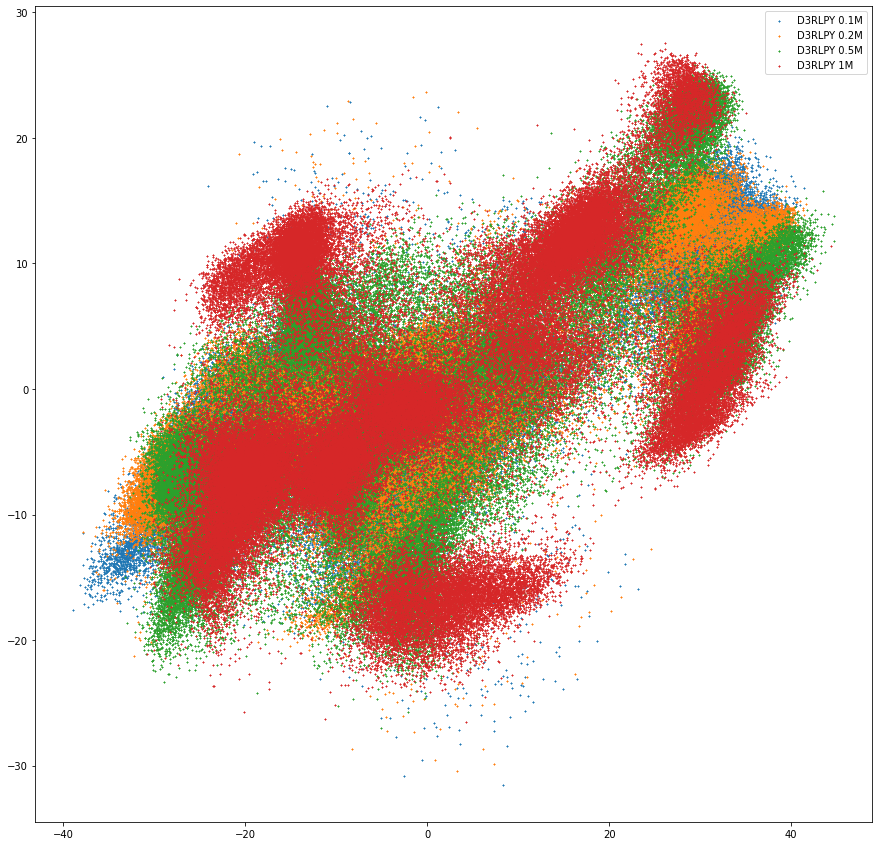

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(d3rlpy_01_trans[:,0], d3rlpy_01_trans[:,1], marker='x', s=1, label='D3RLPY 0.1M')
ax.scatter(d3rlpy_02_trans[:,0], d3rlpy_02_trans[:,1], marker='x', s=1, label='D3RLPY 0.2M')
ax.scatter(d3rlpy_05_trans[:,0], d3rlpy_05_trans[:,1], marker='x', s=1, label='D3RLPY 0.5M')
ax.scatter(d3rlpy_1_trans[:,0], d3rlpy_1_trans[:,1], marker='x', s=1, label='D3RLPY 1M')

ax.legend()

# MP4 and PAP8 Datasets

In [17]:
mp4_0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP4-P0_25000.npy'))[:,:TARGET_DIMS]
mp4_1 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP4-P1_25000.npy'))[:,:TARGET_DIMS]
mp4_2 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP4-P2_25000.npy'))[:,:TARGET_DIMS]
mp4_3 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP4-P3_25000.npy'))[:,:TARGET_DIMS]
mp4_4 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP4-P4_25000.npy'))[:,:TARGET_DIMS]

pap8_0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP8-P0_25000.npy'))[:,:TARGET_DIMS]
pap8_1 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP8-P1_25000.npy'))[:,:TARGET_DIMS]
pap8_2 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP8-P2_25000.npy'))[:,:TARGET_DIMS]
pap8_3 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP8-P3_25000.npy'))[:,:TARGET_DIMS]
pap8_4 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP8-P4_25000.npy'))[:,:TARGET_DIMS]

mp4_0_trans = pca.transform(mp4_0)
mp4_1_trans = pca.transform(mp4_1)
mp4_2_trans = pca.transform(mp4_2)
mp4_3_trans = pca.transform(mp4_3)
mp4_4_trans = pca.transform(mp4_4)

pap8_0_trans = pca.transform(pap8_0)
pap8_1_trans = pca.transform(pap8_1)
pap8_2_trans = pca.transform(pap8_2)
pap8_3_trans = pca.transform(pap8_3)
pap8_4_trans = pca.transform(pap8_4)

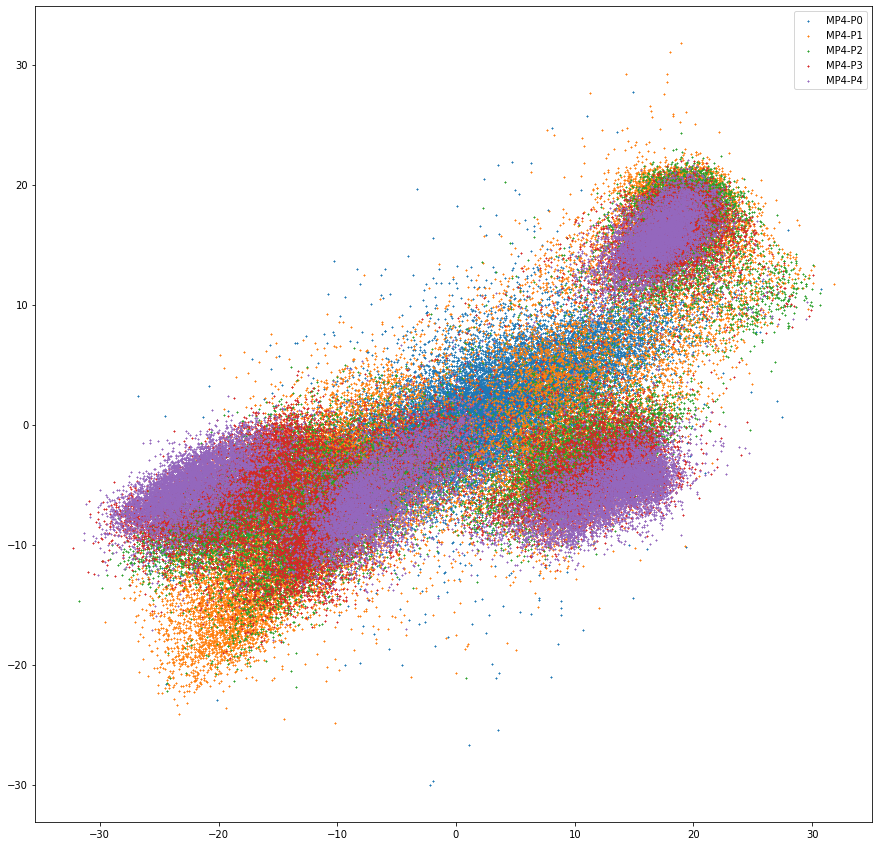

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(mp4_0_trans[:,0], mp4_0_trans[:,1], marker='x', s=1, label='MP4-P0')
ax.scatter(mp4_1_trans[:,0], mp4_1_trans[:,1], marker='x', s=1, label='MP4-P1')
ax.scatter(mp4_2_trans[:,0], mp4_2_trans[:,1], marker='x', s=1, label='MP4-P2')
ax.scatter(mp4_3_trans[:,0], mp4_3_trans[:,1], marker='x', s=1, label='MP4-P3')
ax.scatter(mp4_4_trans[:,0], mp4_4_trans[:,1], marker='x', s=1, label='MP4-P4')

ax.legend()

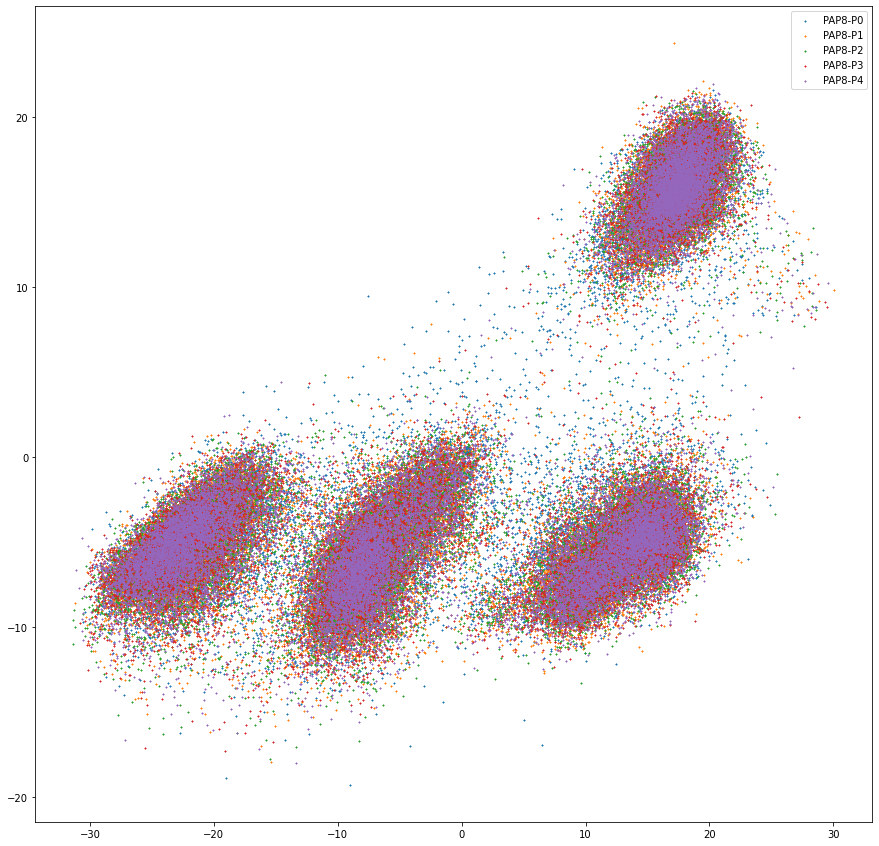

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(pap8_0_trans[:,0], pap8_0_trans[:,1], marker='x', s=1, label='PAP8-P0')
ax.scatter(pap8_1_trans[:,0], pap8_1_trans[:,1], marker='x', s=1, label='PAP8-P1')
ax.scatter(pap8_2_trans[:,0], pap8_2_trans[:,1], marker='x', s=1, label='PAP8-P2')
ax.scatter(pap8_3_trans[:,0], pap8_3_trans[:,1], marker='x', s=1, label='PAP8-P3')
ax.scatter(pap8_4_trans[:,0], pap8_4_trans[:,1], marker='x', s=1, label='PAP8-P4')

ax.legend()

# MIXED-1

In [27]:
mixed_1 = np.load(os.path.join(DATA_DIR, 'MIXED-1.npy'))[:,:TARGET_DIMS]
rand_2 = np.load(os.path.join(DATA_DIR, 'RAND-2.npy'))[:,:TARGET_DIMS]
rand_9 = np.load(os.path.join(DATA_DIR, 'RAND-9.npy'))[:,:TARGET_DIMS]
d3rlpy_mp1_p4 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP1-P4_100000.npy'))[:20000,:TARGET_DIMS]
d3rlpy_mp2_p1 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP2-P1_100000.npy'))[:20000,:TARGET_DIMS]
d3rlpy_pap6_p0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP6-P0_100000.npy'))[:20000,:TARGET_DIMS]


In [28]:
mixed_1_trans = pca.transform(mixed_1)
rand_2_trans = pca.transform(rand_2)
rand_9_trans = pca.transform(rand_9)
d3rlpy_mp1_p4_trans = pca.transform(d3rlpy_mp1_p4)
d3rlpy_mp2_p1_trans = pca.transform(d3rlpy_mp2_p1)
d3rlpy_pap6_p0_trans = pca.transform(d3rlpy_pap6_p0)

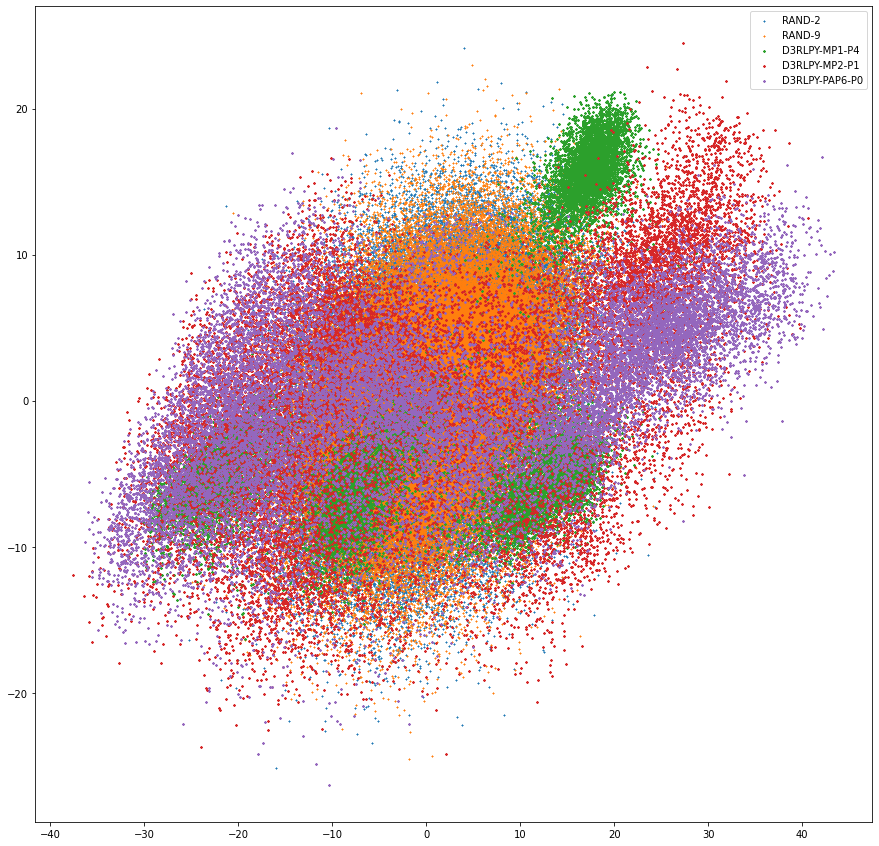

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(rand_2_trans[:,0], rand_2_trans[:,1], marker='x', s=1, label='RAND-2')
ax.scatter(rand_9_trans[:,0], rand_9_trans[:,1], marker='x', s=1, label='RAND-9')
ax.scatter(d3rlpy_mp1_p4_trans[:,0], d3rlpy_mp1_p4_trans[:,1], marker='x', s=3, label='D3RLPY-MP1-P4')
ax.scatter(d3rlpy_mp2_p1_trans[:,0], d3rlpy_mp2_p1_trans[:,1], marker='x', s=3, label='D3RLPY-MP2-P1')
ax.scatter(d3rlpy_pap6_p0_trans[:,0], d3rlpy_pap6_p0_trans[:,1], marker='x', s=3, label='D3RLPY-PAP6-P0')

ax.legend()

# MIXED-2

In [35]:
mixed_2 = np.load(os.path.join(DATA_DIR, 'MIXED-2.npy'))[:,:TARGET_DIMS]
d3rlpy_mp2_p2 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP2-P2_100000.npy'))[:20000,:TARGET_DIMS]
d3rlpy_mp3_p0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP3-P0_100000.npy'))[:20000,:TARGET_DIMS]
d3rlpy_pap5_p0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP5-P0_100000.npy'))[:20000,:TARGET_DIMS]
d3rlpy_pap6_p4 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP6-P4_100000.npy'))[:20000,:TARGET_DIMS]
d3rlpy_pap7_p0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP7-P0_100000.npy'))[:20000,:TARGET_DIMS]


In [36]:
mixed_2 = pca.transform(mixed_2)
d3rlpy_mp2_p2 = pca.transform(d3rlpy_mp2_p2)
d3rlpy_mp3_p0 = pca.transform(d3rlpy_mp3_p0)
d3rlpy_pap5_p0 = pca.transform(d3rlpy_pap5_p0)
d3rlpy_pap6_p4 = pca.transform(d3rlpy_pap6_p4)
d3rlpy_pap7_p0 = pca.transform(d3rlpy_pap7_p0)

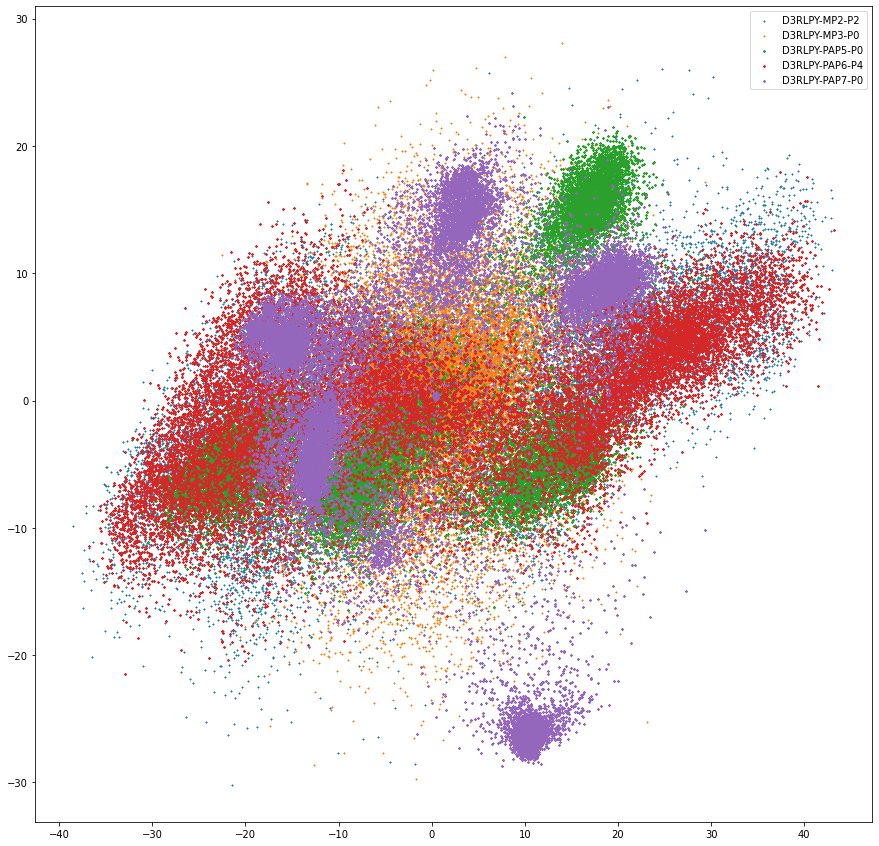

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(d3rlpy_mp2_p2[:,0], d3rlpy_mp2_p2[:,1], marker='x', s=1, label='D3RLPY-MP2-P2')
ax.scatter(d3rlpy_mp3_p0[:,0], d3rlpy_mp3_p0[:,1], marker='x', s=1, label='D3RLPY-MP3-P0')
ax.scatter(d3rlpy_pap5_p0[:,0], d3rlpy_pap5_p0[:,1], marker='x', s=3, label='D3RLPY-PAP5-P0')
ax.scatter(d3rlpy_pap6_p4[:,0], d3rlpy_pap6_p4[:,1], marker='x', s=3, label='D3RLPY-PAP6-P4')
ax.scatter(d3rlpy_pap7_p0[:,0], d3rlpy_pap7_p0[:,1], marker='x', s=3, label='D3RLPY-PAP7-P0')

ax.legend()

# MIXED-3

In [30]:
mixed_2 = np.load(os.path.join(DATA_DIR, 'MIXED-2.npy'))[:,:TARGET_DIMS]
rand_2 = np.load(os.path.join(DATA_DIR, 'RAND-2.npy'))[:20000,:TARGET_DIMS]
rand_9 = np.load(os.path.join(DATA_DIR, 'RAND-9.npy'))[:20000,:TARGET_DIMS]
d3rlpy_mp4_p4 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP4-P4_20000.npy'))[:,:TARGET_DIMS]
d3rlpy_mp5_p1 = np.load(os.path.join(DATA_DIR, 'D3RLPY-MP5-P1_20000.npy'))[:,:TARGET_DIMS]
d3rlpy_pap9_p0 = np.load(os.path.join(DATA_DIR, 'D3RLPY-PAP9-P0_20000.npy'))[:,:TARGET_DIMS]


In [31]:
mixed_2_trans = pca.transform(mixed_2)
rand_2_trans = pca.transform(rand_2)
rand_9_trans = pca.transform(rand_9)
d3rlpy_mp4_p4_trans = pca.transform(d3rlpy_mp4_p4)
d3rlpy_mp5_p1_trans = pca.transform(d3rlpy_mp5_p1)
d3rlpy_pap9_p0_trans = pca.transform(d3rlpy_pap9_p0)

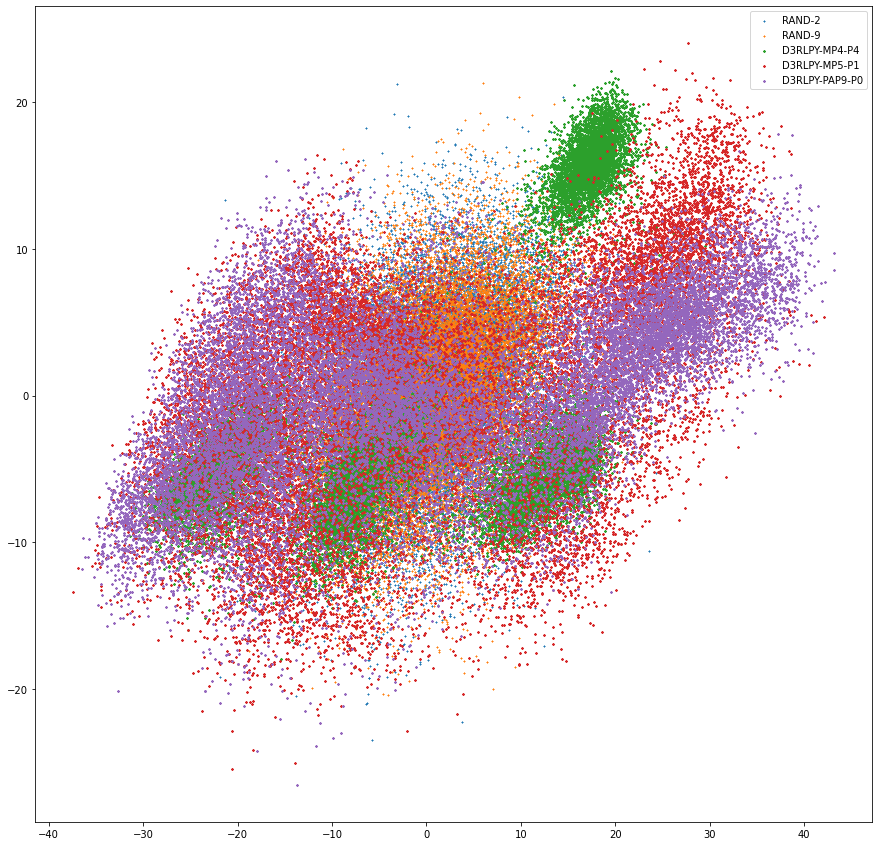

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(rand_2_trans[:,0], rand_2_trans[:,1], marker='x', s=1, label='RAND-2')
ax.scatter(rand_9_trans[:,0], rand_9_trans[:,1], marker='x', s=1, label='RAND-9')
ax.scatter(d3rlpy_mp4_p4_trans[:,0], d3rlpy_mp4_p4_trans[:,1], marker='x', s=3, label='D3RLPY-MP4-P4')
ax.scatter(d3rlpy_mp5_p1_trans[:,0], d3rlpy_mp5_p1_trans[:,1], marker='x', s=3, label='D3RLPY-MP5-P1')
ax.scatter(d3rlpy_pap9_p0_trans[:,0], d3rlpy_pap9_p0_trans[:,1], marker='x', s=3, label='D3RLPY-PAP9-P0')

ax.legend()

In [ ]:
mixed_3 = np.load(os.path.join(DATA_DIR, 'MIXED-3.npy'))[:,:TARGET_DIMS]

mixed_2_trans = pca.transform(mixed_2)
mixed_3_trans = pca.transform(mixed_3)

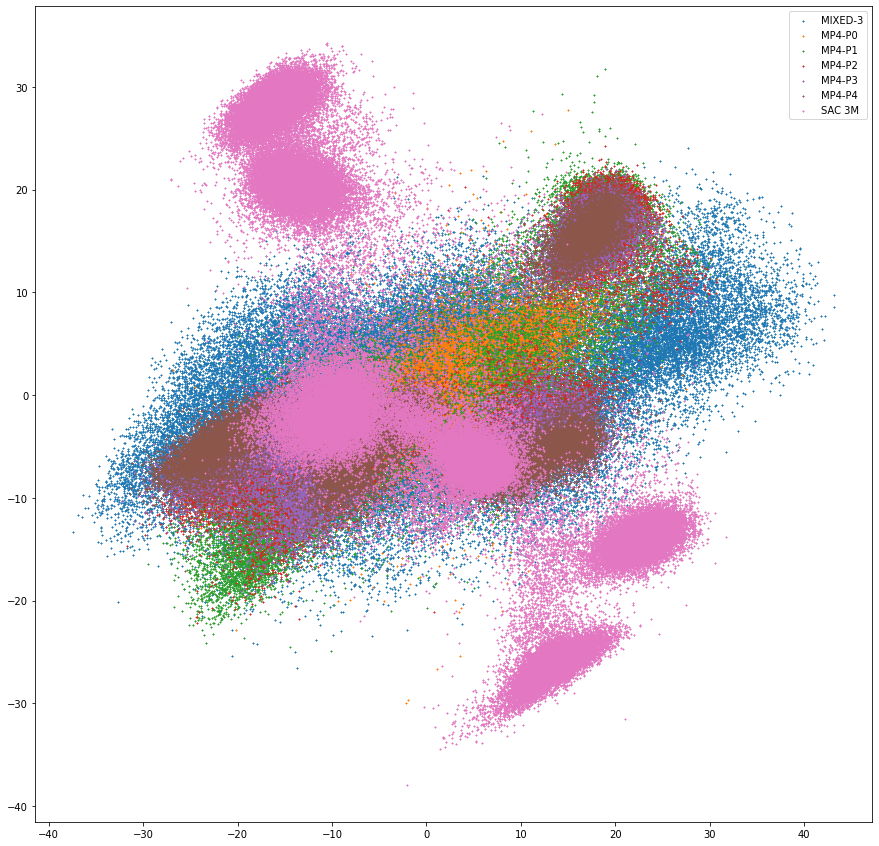

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(mixed_3_trans[:,0], mixed_3_trans[:,1], marker='x', s=1, label='MIXED-3')
ax.scatter(mp4_0_trans[:,0], mp4_0_trans[:,1], marker='x', s=1, label='MP4-P0')
ax.scatter(mp4_1_trans[:,0], mp4_1_trans[:,1], marker='x', s=1, label='MP4-P1')
ax.scatter(mp4_2_trans[:,0], mp4_2_trans[:,1], marker='x', s=1, label='MP4-P2')
ax.scatter(mp4_3_trans[:,0], mp4_3_trans[:,1], marker='x', s=1, label='MP4-P3')
ax.scatter(mp4_4_trans[:,0], mp4_4_trans[:,1], marker='x', s=1, label='MP4-P4')
ax.scatter(sac_3_m_trans[:,0], sac_3_m_trans[:,1], marker='x', s=1, label='SAC 3M')

ax.legend()

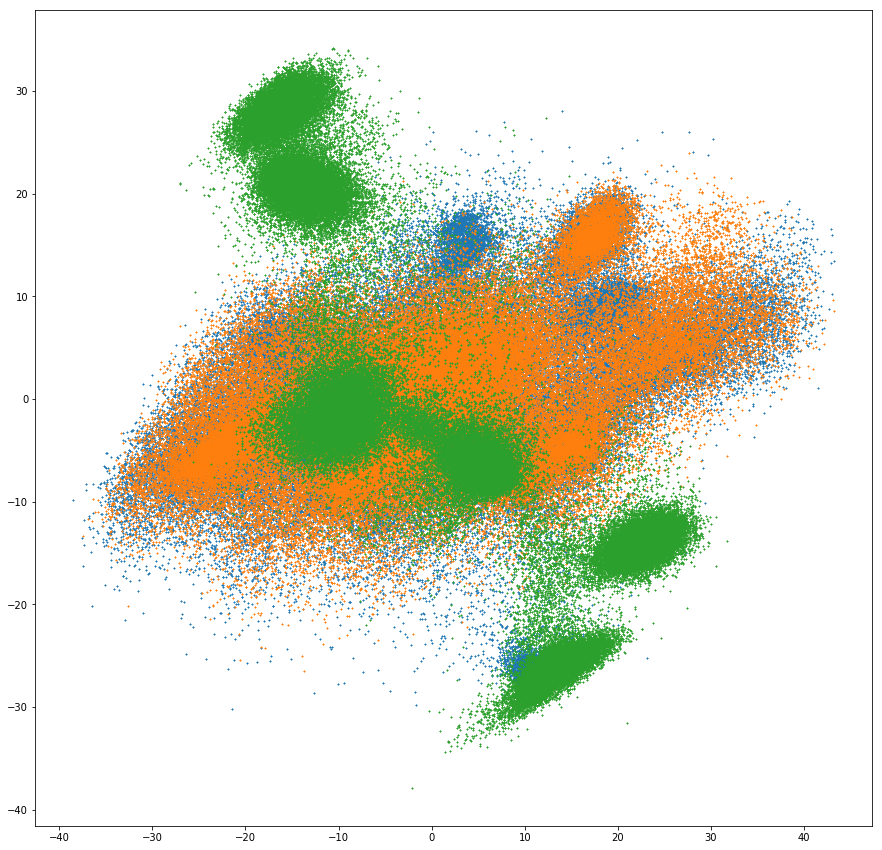

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.scatter(mixed_2_trans[:,0], mixed_2_trans[:,1], marker='x', s=1)
ax.scatter(mixed_3_trans[:,0], mixed_3_trans[:,1], marker='x', s=1)
ax.scatter(sac_3_m_trans[:,0], sac_3_m_trans[:,1], marker='x', s=1)